In [1]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import netCDF4 as nc

file_path = "/Users/kavehdehghan/Desktop/ML_WORKFLOW/Seismic/Merged_Data.seisnc"

try:
    ds = nc.Dataset(file_path, 'r')
    print(ds)
except OSError as e:
    print(f"Error opening file: {e}")

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    sample_rate: 4.0
    text: C01   SEG-Y exported from OpendTect 7.0.6b at Fri 09 Aug 2024, 14:13:19, CE
C02   Survey:       Poseidon_3D
C03   Data name:    FarStack_Decim_Instantaneous
C04   Component:    Inst_Frequency
C05  ----------------------------------------------------------------------
C06   Corner 1:  X: 416132.22  Y: 8447593.90  IL: 983  XL: 504
C07   Corner 2:  X: 367756.42  Y: 8488186.96  IL: 983  XL: 5556
C08   Corner 3:  X: 409169.20  Y: 8537539.64  IL: 4419  XL: 5556
C09   Corner 4:  X: 457545.00  Y: 8496946.58  IL: 4419  XL: 504
C10   Bin size:  18.75 x 12.50 (m)
C11   Projection: [EPSG:28351] GDA94 / MGA zone 51
C12  ----------------------------------------------------------------------
C13   In-line:      983-4419    inc: 1
C14   Cross-line:   504-5556    inc: 1
C15   Z (ms):       2500-4000   inc: 4
C16  ----------------------------------------------------------------------
C17 

In [3]:
# Open the dataset with xarray
merged_seismic = xr.open_dataset(file_path)


# Print the dataset to inspect its contents
print(merged_seismic)

<xarray.Dataset>
Dimensions:                                      (iline: 860, xline: 1264,
                                                  twt: 126)
Coordinates:
  * iline                                        (iline) uint16 983 987 ... 4419
  * xline                                        (xline) uint16 504 508 ... 5556
  * twt                                          (twt) float64 3e+03 ... 3.5e+03
    cdp_x                                        (iline, xline) float32 ...
    cdp_y                                        (iline, xline) float32 ...
Data variables:
    data_FarStack_Decim_Instantaneous_Frequency  (iline, xline, twt) float32 ...
    data_FarStack_Decim_Frequency                (iline, xline, twt) float32 ...
    data_FarStack_Decim_SpecDecomp_30Hz          (iline, xline, twt) float32 ...
Attributes:
    sample_rate:         4.0
    text:                C01   SEG-Y exported from OpendTect 7.0.6b at Fri 09...
    measurement_system:  m
    source_file:         FarStac

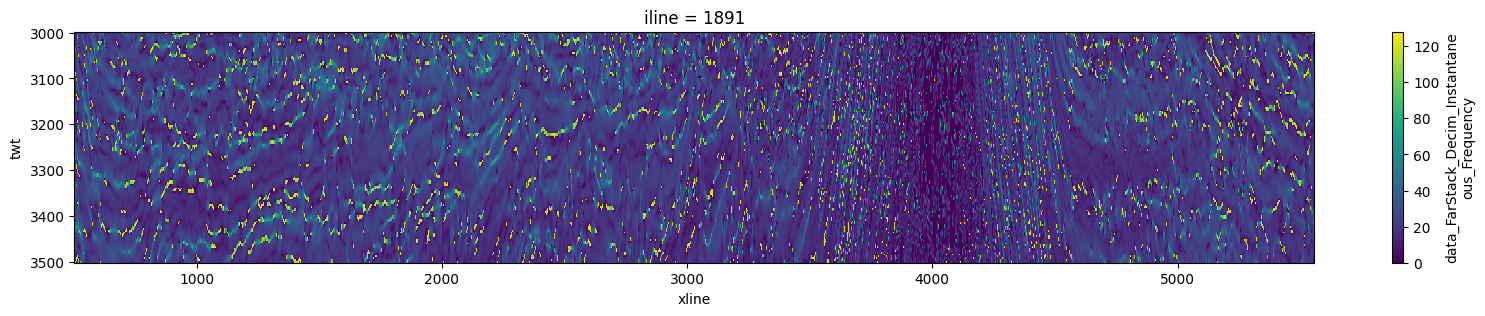

In [5]:
merged_seismic.sel(iline=1891).data_FarStack_Decim_Instantaneous_Frequency.T.plot(yincrease=False, figsize=(20, 3), vmax=128)


In [6]:
# Print the dimensions and coordinates of the dataset
print("Dataset dimensions:")
print(merged_seismic.dims)

print("\nDataset coordinates:")
print(merged_seismic.coords)

# Print dimensions and coordinates for each variable
for var_name in merged_seismic.variables:
    var = merged_seismic[var_name]
    print(f"\nVariable: {var_name}")
    print("Dimensions:", var.dims)
    print("Coordinates:", var.coords)


Dataset dimensions:
Frozen({'iline': 860, 'xline': 1264, 'twt': 126})

Dataset coordinates:
Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 4403 4407 4411 4415 4419
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556
  * twt      (twt) float64 3e+03 3.004e+03 3.008e+03 ... 3.496e+03 3.5e+03
    cdp_x    (iline, xline) float32 ...
    cdp_y    (iline, xline) float32 ...

Variable: iline
Dimensions: ('iline',)
Coordinates: Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 4403 4407 4411 4415 4419

Variable: xline
Dimensions: ('xline',)
Coordinates: Coordinates:
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556

Variable: twt
Dimensions: ('twt',)
Coordinates: Coordinates:
  * twt      (twt) float64 3e+03 3.004e+03 3.008e+03 ... 3.496e+03 3.5e+03

Variable: cdp_x
Dimensions: ('iline', 'xline')
Coordinates: Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 4403 4407 4411 4415 4419
  * 

In [ ]:

# Filter variables that start with 'data_'
data_vars = [var for var in merged_seismic.variables if var.startswith('data_')]

# Create a figure with subplots
n_vars = len(data_vars)
n_cols = 3  # Number of columns in subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Compute number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define the aspect ratios you want for each subplot
# For example, you might want to set them to a list of floats or 'auto'/'equal'
aspect_ratios = ['auto'] * n_vars  # Use 'auto' for all or customize

# Plot each filtered variable
for i, var_name in enumerate(data_vars):
    ax = axes[i]
    var_data = merged_seismic[var_name]

    # Flatten the data to compute quantiles
    data_flat = var_data.values.flatten()
    
    # Calculate quantiles for vmin and vmax
    q_low = np.percentile(data_flat, 5)  # 5th percentile for vmin
    q_high = np.percentile(data_flat, 95)  # 95th percentile for vmax  


    # Plot using 'iline'
    try:
        data_to_plot = var_data.sel(iline=2391).data
        if data_to_plot.ndim == 2:
            data_to_plot = data_to_plot.T  # Transpose if needed
            cax = ax.imshow(data_to_plot, aspect=2.5, cmap='seismic', vmin=q_low, vmax=q_high)
    except Exception as e:
        print(f"Error plotting {var_name}: {e}")

    ax.set_title(var_name)
    ax.set_xlabel('xline ')
    ax.set_ylabel('twt ')

    # Create a custom axis for the colorbar below the plot with increased spacing
    colorbar_height = 0.015  # Height of the color bar
    spacing = 0.04  # Space between the plot and color bar
        
    cbar_ax = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - colorbar_height - spacing, ax.get_position().width, colorbar_height])
    cbar = fig.colorbar(cax, cax=cbar_ax, orientation='horizontal')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.show()


In [30]:
import matplotlib.pyplot as plt
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G